### Importing the necessary packages

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from linearmodels import PanelOLS
import statsmodels.api as sm

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import MaxNLocator, FuncFormatter

### Reading in the data

In [6]:
df = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/data/final.csv')

In [7]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1,inplace = True) 

### Creating dummy variables and renaming the columns

In [8]:
df = pd.get_dummies(df, columns=['AGE'])

In [9]:
df.rename(columns = {'AGE_15 to 19':'fifteen_nineteen','AGE_20 to 24':'twnty_twntyfour','AGE_25 to 29':'twntyfiv_twntynine','AGE_35 to 39':'thrtyfiv_thrtynine'}, inplace = True)

In [10]:
df = pd.get_dummies(df, columns=['STATE'])

In [11]:
df.columns = df.columns.str.replace(' ','_')

In [54]:
'+'.join(df.columns)

'measure+cause+metric+YEAR+DEATH_RTE+LESS_HS+HS+SOM_COL+COL_PLUS+RTE_CHL+RTE_GON+PRC_BLK+PRC_WHT+PRC_HISP+PRC_OTHER+fifteen_nineteen+twnty_twntyfour+twntyfiv_twntynine+thrtyfiv_thrtynine+STATE_Alabama+STATE_Alaska+STATE_Arizona+STATE_Arkansas+STATE_California+STATE_Colorado+STATE_Connecticut+STATE_Delaware+STATE_District_of_Columbia+STATE_Florida+STATE_Georgia+STATE_Hawaii+STATE_Idaho+STATE_Illinois+STATE_Indiana+STATE_Iowa+STATE_Kansas+STATE_Kentucky+STATE_Louisiana+STATE_Maryland+STATE_Massachusetts+STATE_Michigan+STATE_Minnesota+STATE_Mississippi+STATE_Missouri+STATE_Nebraska+STATE_Nevada+STATE_New_Jersey+STATE_New_Mexico+STATE_New_York+STATE_North_Carolina+STATE_Ohio+STATE_Oklahoma+STATE_Oregon+STATE_Pennsylvania+STATE_Rhode_Island+STATE_South_Carolina+STATE_South_Dakota+STATE_Tennessee+STATE_Texas+STATE_Utah+STATE_Virginia+STATE_Washington+STATE_West_Virginia+STATE_Wisconsin+STATE_Wyoming'

### Baseline OLS model

**Notes**: 

Using all of our variables gives the highest R-squared and Adj. R-squared, indicating that our model is doing a good job in explaining the variance in the data. 

- The p-values of the variables below indicate statistical significance at the 95% significance level

- RTE_GON - negative impact on the DEATH_RTE

- PRC_BLK - negative impact on the DEATH_RTE

- PRC_WHT - negative impact on the DEATH_RTE

- PRC_HISP - positive impact on the DEATH_RTE

- fifteen_nineteen - negative impact on the DEATH_RTE

- twnty_twntyfour - positive impact on the DEATH_RTE

- twntyfiv_twntynine - positive impact on the DEATH_RTE

- thrtyfiv_thrtynine - positive impact on the DEATH_RTE

It is not surprising that the older groups of woman are impacting the maternal death rates more in comparison to the younger groups. It is important to note that the percent of white and black fertile women impact the maternal death rate disproportionally. 

In [58]:
f = 'DEATH_RTE~LESS_HS+HS+SOM_COL+RTE_CHL+RTE_GON+PRC_BLK+PRC_WHT+PRC_HISP+fifteen_nineteen+twnty_twntyfour+twntyfiv_twntynine+thrtyfiv_thrtynine+STATE_Alabama+STATE_Alaska+STATE_Arizona+STATE_Arkansas+STATE_California+STATE_Colorado+STATE_Connecticut+STATE_Delaware+STATE_District_of_Columbia+STATE_Florida+STATE_Georgia+STATE_Hawaii+STATE_Idaho+STATE_Illinois+STATE_Indiana+STATE_Iowa+STATE_Kansas+STATE_Kentucky+STATE_Louisiana+STATE_Maryland+STATE_Massachusetts+STATE_Michigan+STATE_Minnesota+STATE_Mississippi+STATE_Missouri+STATE_Nebraska+STATE_Nevada+STATE_New_Jersey+STATE_New_Mexico+STATE_New_York+STATE_North_Carolina+STATE_Ohio+STATE_Oklahoma+STATE_Oregon+STATE_Pennsylvania+STATE_Rhode_Island+STATE_South_Carolina+STATE_South_Dakota+STATE_Tennessee+STATE_Texas+STATE_Utah+STATE_Virginia+STATE_Washington+STATE_West_Virginia+STATE_Wisconsin'
model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     94.19
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:43:28   Log-Likelihood:                -3947.4
No. Observations:                1158   AIC:                             8009.
Df Residuals:                    1101   BIC:                             8297.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Creating a function to iterate through our features one by one to control for age (OLS model) 

Here I test our dependent variable against each of our features

In [12]:
features = ['LESS_HS','HS', 'SOM_COL', 'COL_PLUS', 'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT','PRC_HISP', 'PRC_OTHER']

In [27]:
def OLS(features):
    for feature in features:
        f = 'DEATH_RTE~fifteen_nineteen+twnty_twntyfour+twntyfiv_twntynine+thrtyfiv_thrtynine+STATE_Alabama+STATE_Alaska+STATE_Arizona+STATE_Arkansas+STATE_California+STATE_Colorado+STATE_Connecticut+STATE_Delaware+STATE_District_of_Columbia+STATE_Florida+STATE_Georgia+STATE_Hawaii+STATE_Idaho+STATE_Illinois+STATE_Indiana+STATE_Iowa+STATE_Kansas+STATE_Kentucky+STATE_Louisiana+STATE_Maryland+STATE_Massachusetts+STATE_Michigan+STATE_Minnesota+STATE_Mississippi+STATE_Missouri+STATE_Nebraska+STATE_Nevada+STATE_New_Jersey+STATE_New_Mexico+STATE_New_York+STATE_North_Carolina+STATE_Ohio+STATE_Oklahoma+STATE_Oregon+STATE_Pennsylvania+STATE_Rhode_Island+STATE_South_Carolina+STATE_South_Dakota+STATE_Tennessee+STATE_Texas+STATE_Utah+STATE_Virginia+STATE_Washington+STATE_West_Virginia+STATE_Wisconsin+'+feature
        model = ols(formula=f, data=df).fit()
        print(model.summary())

In [28]:
OLS(features)

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     67.67
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          3.63e-295
Time:                        18:35:12   Log-Likelihood:                -4162.7
No. Observations:                1158   AIC:                             8425.
Df Residuals:                    1108   BIC:                             8678.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     78.62
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          2.37e-322
Time:                        18:35:12   Log-Likelihood:                -4096.4
No. Observations:                1158   AIC:                             8293.
Df Residuals:                    1108   BIC:                             8546.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     67.22
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          5.58e-294
Time:                        18:35:12   Log-Likelihood:                -4165.6
No. Observations:                1158   AIC:                             8431.
Df Residuals:                    1108   BIC:                             8684.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.63
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          1.12e-297
Time:                        18:35:12   Log-Likelihood:                -4156.6
No. Observations:                1158   AIC:                             8413.
Df Residuals:                    1108   BIC:                             8666.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     66.40
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          8.35e-292
Time:                        18:35:13   Log-Likelihood:                -4170.9
No. Observations:                1158   AIC:                             8442.
Df Residuals:                    1108   BIC:                             8695.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

**Notes**: 

When testing one IV against our DV while holding age and location constant, each IV is statistically significant. Of course not each of these variables have statistical significance when we test them against our DV with additional features. We could said that the results above are biased, and they they don't give us a clear picture of exactly what is going on since that statistical significance does not hold when we include more features in the model.

### Baseline Fixed Effects Model

**Notes**: 

For the fixed effects model we see some slightly difference results in comparison to the OLS model.

For the fixed effect models we made, using all of our variables gives the highest R-squared, indicating that our model is doing a good job in explaining the variance in the data. 

- The p-values of the variables below indicate statistical significance at the 95% significance level

- RTE_GON - negative impact on the DEATH_RTE

- PRC_BLK - negative impact on the DEATH_RTE

- PRC_WHT - negative impact on the DEATH_RTE

- fifteen_nineteen - positive impact on the DEATH_RTE

- twnty_twntyfour - positive impact on the DEATH_RTE

- twntyfiv_twntynine - positive impact on the DEATH_RTE

- thrtyfiv_thrtynine - positive impact on the DEATH_RTE

We see similar results to the OLS model with some differences. The FE model suggests that woman in the age range of 15-19 do impact the rate of maternal morality positively. Additionally, the percent of Hispanic fertile women is not a statistically significant feature in this baseline model.

Similarly, groups of older woman are impacting the maternal death rate more in comparison to the younger groups. Also,  the percent of white and black fertile women impact the maternal death rate disproportionally in this model as well. 

In [33]:
#convert year to datetime
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
#add column year to index
df=df.set_index('YEAR', append=True)
#swap indexes
df.index = df.index.swaplevel(0,1)

In [60]:
baseline_features = ['LESS_HS',
       'HS', 'SOM_COL', 'COL_PLUS', 'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT',
       'PRC_HISP', 'fifteen_nineteen', 'twnty_twntyfour',
       'twntyfiv_twntynine', 'thrtyfiv_thrtynine','STATE_Alabama',
       'STATE_Alaska', 'STATE_Arizona', 'STATE_Arkansas', 'STATE_California',
       'STATE_Colorado', 'STATE_Connecticut', 'STATE_Delaware',
       'STATE_District_of_Columbia', 'STATE_Florida', 'STATE_Georgia',
       'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Indiana',
       'STATE_Iowa', 'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana',
       'STATE_Maryland', 'STATE_Massachusetts', 'STATE_Michigan',
       'STATE_Minnesota', 'STATE_Mississippi', 'STATE_Missouri',
       'STATE_Nebraska', 'STATE_Nevada', 'STATE_New_Jersey',
       'STATE_New_Mexico', 'STATE_New_York', 'STATE_North_Carolina',
       'STATE_Ohio', 'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
       'STATE_Rhode_Island', 'STATE_South_Carolina', 'STATE_South_Dakota',
       'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah', 'STATE_Virginia',
       'STATE_Washington', 'STATE_West_Virginia', 'STATE_Wisconsin']

In [65]:
model_fe = PanelOLS(df.DEATH_RTE, df[baseline_features], entity_effects = True)
fe_res = model_fe.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.8304
Estimator:                   PanelOLS   R-squared (Between):              0.3383
No. Observations:                1158   R-squared (Within):               0.8304
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.8267
Time:                        13:50:28   Log-likelihood                   -3932.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      93.626
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                 F(57,1090)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             264.66
                            

### Creating a function to iterate through our features one by one to control for age (FE model) 

In [31]:
features = ['LESS_HS', 'HS','SOM_COL', 'COL_PLUS', 'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT','PRC_HISP', 'PRC_OTHER']

In [34]:
def FE(features):
    for feature in features:
        model_fe = PanelOLS(df.DEATH_RTE, df[['fifteen_nineteen', 'twnty_twntyfour','twntyfiv_twntynine', 'thrtyfiv_thrtynine','STATE_Alabama','STATE_Alaska', 'STATE_Arizona', 'STATE_Arkansas', 'STATE_California','STATE_Colorado', 'STATE_Connecticut', 'STATE_Delaware','STATE_District_of_Columbia', 'STATE_Florida', 'STATE_Georgia','STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Indiana','STATE_Iowa', 'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana','STATE_Maryland', 'STATE_Massachusetts', 'STATE_Michigan','STATE_Minnesota', 'STATE_Mississippi', 'STATE_Missouri','STATE_Nebraska', 'STATE_Nevada', 'STATE_New_Jersey','STATE_New_Mexico', 'STATE_New_York', 'STATE_North_Carolina','STATE_Ohio', 'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania','STATE_Rhode_Island', 'STATE_South_Carolina', 'STATE_South_Dakota','STATE_Tennessee', 'STATE_Texas', 'STATE_Utah', 'STATE_Virginia','STATE_Washington', 'STATE_West_Virginia', 'STATE_Wisconsin',feature]], entity_effects = True)
        fe_res = model_fe.fit()
        print(fe_res)

In [35]:
FE(features)

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.7508
Estimator:                   PanelOLS   R-squared (Between):              0.5728
No. Observations:                1158   R-squared (Within):               0.7508
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.7495
Time:                        19:26:49   Log-likelihood                   -4155.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      67.501
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                 F(49,1098)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             203.89
                            

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.7787
Estimator:                   PanelOLS   R-squared (Between):              0.4677
No. Observations:                1158   R-squared (Within):               0.7787
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.7765
Time:                        19:26:49   Log-likelihood                   -4086.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      78.868
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                 F(49,1098)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             232.50
                            

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.7501
Estimator:                   PanelOLS   R-squared (Between):              0.5006
No. Observations:                1158   R-squared (Within):               0.7501
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.7482
Time:                        19:26:50   Log-likelihood                   -4157.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      67.253
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                 F(49,1098)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             203.27
                            

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.7535
Estimator:                   PanelOLS   R-squared (Between):              0.5682
No. Observations:                1158   R-squared (Within):               0.7535
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.7521
Time:                        19:26:50   Log-likelihood                   -4149.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      68.480
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                 F(49,1098)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             206.36
                            

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.7473
Estimator:                   PanelOLS   R-squared (Between):              0.5558
No. Observations:                1158   R-squared (Within):               0.7473
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.7459
Time:                        19:26:50   Log-likelihood                   -4163.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      66.255
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                 F(49,1098)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             200.76
                            

**Notes**:

Like our OLS function, we are experiencing biased results with the models produced from our FE function as well. 

**Visualizations**

In [45]:
import seaborn as sns
sns.set_style("whitegrid")

In [65]:
df = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/data/final.csv')

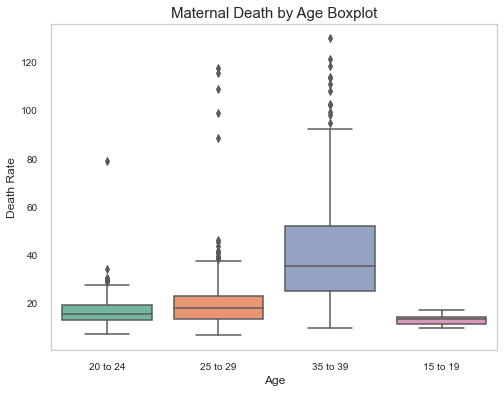

In [72]:
plt.figure(figsize=(8, 6))
fig = sns.boxplot(x=df["AGE"], y=df["DEATH_RTE"], data=df,palette="Set2")
plt.xlabel("Age",fontsize=12)
plt.ylabel("Death Rate",fontsize=12)
plt.title("Maternal Death by Age Boxplot",fontsize = 15) # You can comment this line out if you don't need title
plt.tick_params(labelsize=10)
plt.grid(False)
plt.show(fig)

**What is this graph showing us?**

We can see that in the age range of 35 to 39 we see that there are a lot of instances of higher mortality rates (aligned with what we see the graph below. 35 to 39 seems to experience a more severe level of outliers in comparison to the other age groups. 

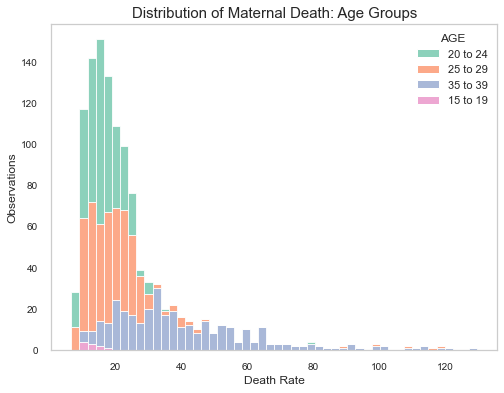

In [74]:
plt.figure(figsize=(8, 6))
fig = sns.histplot(data=df, x="DEATH_RTE", hue="AGE",multiple="stack",palette="Set2")
plt.xlabel("Death Rate",fontsize=12)
plt.ylabel("Observations",fontsize=12)
plt.title("Distribution of Maternal Death: Age Groups",fontsize = 15) # You can comment this line out if you don't need title
plt.tick_params(labelsize=10)
plt.grid(False)
plt.show(fig)

**What is this graph showing us?**

In the graph above we can see that the younger age groups (20-24 & 25-29) experience lower rates of maternal mortality. We can see that the older age groups (35-39) experience higher rates of maternal mortality. This is expected because pregnancy because riskier as a woman ages. Women in their 30s are more at risk for events such as ectopic pregnancy.

In [55]:
def line_graph(x_axis,y_axis):
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df, x=x_axis, y=y_axis)
    plt.xlabel(x_axis,fontsize=12)
    plt.ylabel(y_axis,fontsize=12)
    plt.title(y_axis + " over time",fontsize = 15) # You can comment this line out if you don't need title
    plt.tick_params(labelsize=10)
    plt.grid(False)
    plt.show(fig)

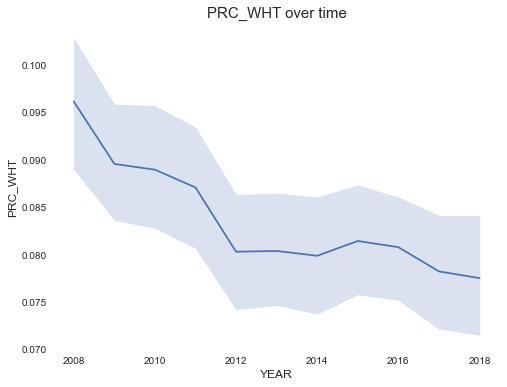

In [56]:
line_graph('YEAR','PRC_WHT')

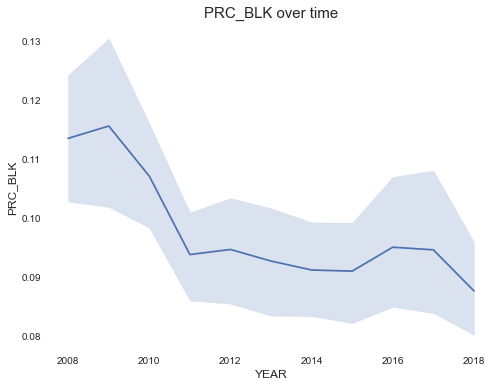

In [57]:
line_graph('YEAR','PRC_BLK')

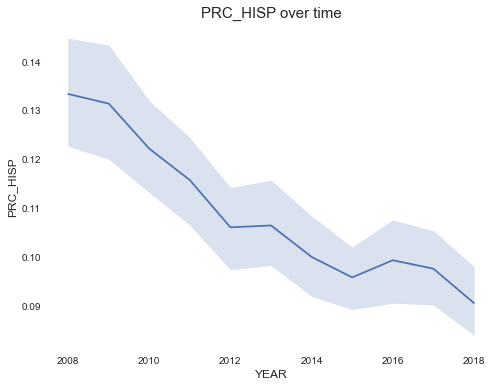

In [58]:
line_graph('YEAR','PRC_HISP')

**What are these graphs showing us?**

The percent of fertile women among all racial groups has been declining over time. The reason as to why this is occurring is note entirely clear.